## Project 5 Data Steam Mining

In [ ]:
# Fahad Waseem Butt, 21801356

In [ ]:
# Required to correctly display interactive (dynamic) plots in Jupyter notebooks
%matplotlib notebook

In [ ]:
from skmultiflow.data import HyperplaneGenerator
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.bayes import NaiveBayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Hyperplane Generator (for Dataset Generation)
#### 'Parameters'

random_state: int, RandomState instance or None, optional (default=None)

n_features: int (Default 10) The number of attributes to generate. Higher than 2.

n_drift_features: int (Default: 2) The number of attributes with drift. Higher than 2.

mag_change: float (Default: 0.0) Magnitude of the change for every example. From 0.0 to 1.0.

noise_percentage: float (Default: 0.05) Percentage of noise to add to the data. From 0.0 to 1.0.

sigma_percentage: int (Default 0.1) Percentage of probability that the direction of change is reversed. From 0.0 to 1.0.

In [ ]:
# Hyperplane Dataset (noise= 10%, number of drifting features= 2)
Hyperplane_Dataset_10_2 = HyperplaneGenerator(n_features=10, n_drift_features=2, noise_percentage=0.1)
# Hyperplane Dataset (noise= 30%, number of drifting features= 2)
Hyperplane_Dataset_30_2 = HyperplaneGenerator(n_features=10, n_drift_features=2, noise_percentage=0.3)
# Hyperplane Dataset (noise= 10%, number of drifting features= 5)
Hyperplane_Dataset_10_5 = HyperplaneGenerator(n_features=10, n_drift_features=5, noise_percentage=0.1)
# Hyperplane Dataset (noise= 30%, number of drifting features= 5)
Hyperplane_Dataset_30_5 = HyperplaneGenerator(n_features=10, n_drift_features=5, noise_percentage=0.3)

In [ ]:
# SAVE DATASET
# Hyperplane Dataset (noise= 10%, number of drifting features= 2)
Hyperplane_Dataset_10_2 = HyperplaneGenerator(n_features=10, n_drift_features=2, noise_percentage=0.1)

x, y = Hyperplane_Dataset_10_2.next_sample(20000)
print(x.shape, y.shape)

# Save data into a csv file
df = pd.DataFrame(np.hstack((x,np.array([y]).T)))
df.to_csv("Hyperplane_Dataset_10_2.csv")

(20000, 10) (20000,)


In [ ]:
# SELECT HYPERPLANE DATASET (Uncomment wanted dataset)

sel_stream=Hyperplane_Dataset_10_2
#sel_stream=Hyperplane_Dataset_30_2 
#sel_stream=Hyperplane_Dataset_10_5
#sel_stream=Hyperplane_Dataset_30_5 

### 2. Setup Classifiers (Online Single Classifiers):
#### a. `Hoeffding Tree`  b. `K Nearest Neighbour` c. `Naive Bayes`

In [ ]:
sel_cfrs = [HoeffdingTreeClassifier(),KNNClassifier(n_neighbors=10, max_window_size=100, leaf_size=30), NaiveBayes()]

### 3. Evaluate Classifiers (prequential evaluation)

<IPython.core.display.Javascript object>


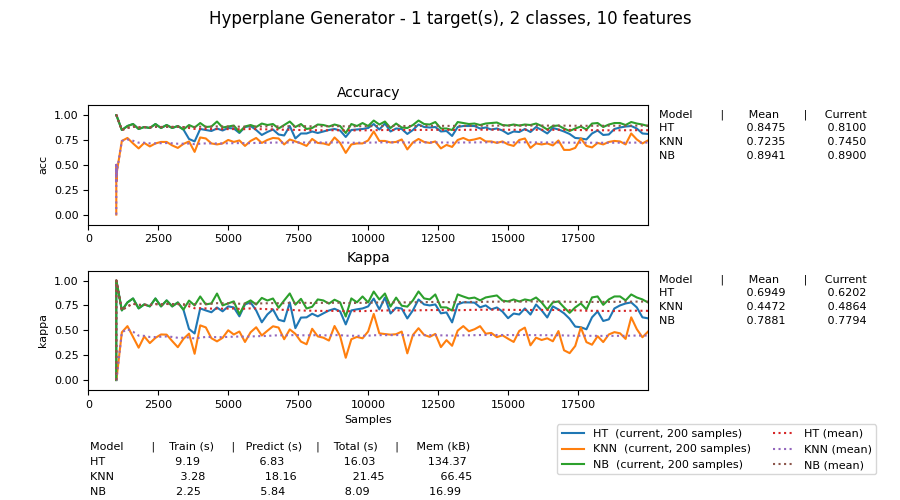

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [70.62s]
Processed samples: 20000
Mean performance:
HT - Accuracy     : 0.8475
HT - Kappa        : 0.6949
HT - Training time (s)  : 9.19
HT - Testing time  (s)  : 6.83
HT - Total time    (s)  : 16.03
HT - Size (kB)          : 134.3701
KNN - Accuracy     : 0.7235
KNN - Kappa        : 0.4472
KNN - Training time (s)  : 3.28
KNN - Testing time  (s)  : 18.16
KNN - Total time    (s)  : 21.45
KNN - Size (kB)          : 66.4492
NB - Accuracy     : 0.8941
NB - Kappa        : 0.7881
NB - Training time (s)  : 2.25
NB - Testing time  (s)  : 5.84
NB - Total time    (s)  : 8.09
NB - Size (kB)          : 16.9912


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05),
 KNNClassifier(leaf_size=30, max_window_size=100, metric='euclidean',
               n_neighbors=10),
 NaiveBayes(nominal_attributes=None)]

In [ ]:
Eval_Preq = EvaluatePrequential(show_plot=True,
                                pretrain_size=1000, max_samples=20000, batch_size=1,
                                metrics=['accuracy', 'kappa', 'running_time', 'model_size'])
Eval_Preq.evaluate(stream=sel_stream, model=sel_cfrs, model_names=["HT", "KNN", "NB"])

## Voting Methods

In [ ]:
#https://analyticsindiamag.com/a-beginners-guide-to-hoeffding-tree-with-python-implementation/
n_samples = 0
correct_cnt1 = 0
correct_cnt2 = 0
correct_cnt3 = 0
correct_cnt4 = 0
correct_cnt5 = 0
max_samples = 20000
ht = HoeffdingTreeClassifier()
NB=NaiveBayes()
KNN=KNNClassifier(n_neighbors=10, max_window_size=100, leaf_size=30)
while n_samples < max_samples and sel_stream.has_more_samples():
    X, Y = sel_stream.next_sample()
    P1 = ht.predict(X)
    P2 = NB.predict(X)
    P3 = KNN.predict(X)
    P_MV=np.argmax(np.bincount([P1[0], P2[0], P3[0]]))
    P_WMV=np.argmax(np.bincount([P1[0], P2[0], P3[0]],weights=[0.3, 0.5, 0.2]))
    if Y[0] == P1:
        correct_cnt1 += 1
    if Y[0] == P2:
        correct_cnt2 += 1
    if Y[0] == P3:
        correct_cnt3 += 1
    if Y[0] == P_MV:
        correct_cnt4 += 1
    if Y[0] == P_WMV:
        correct_cnt5 += 1
        
    ht = ht.partial_fit(X, Y)
    NB = NB.partial_fit(X, Y)
    KNN = KNN.partial_fit(X, Y)
    n_samples += 1
print('{} samples for analysis.'.format(n_samples))
print('HT Accuracy: {}'.format(correct_cnt1 / n_samples))
print('NB Accuracy: {}'.format(correct_cnt2 / n_samples))
print('KNN Accuracy: {}'.format(correct_cnt3 / n_samples))
print('Majority Voting Accuracy: {}'.format(correct_cnt4 / n_samples))
print('Weighted Majority Voting Accuracy: {}'.format(correct_cnt5 / n_samples))

20000 samples for analysis.
HT Accuracy: 0.8459
NB Accuracy: 0.89095
KNN Accuracy: 0.7242
Majority Voting Accuracy: 0.87285
Weighted Majority Voting Accuracy: 0.8802
